C:\Users\shera\anaconda3\Lib\site-packages\pandas_datareader\wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(


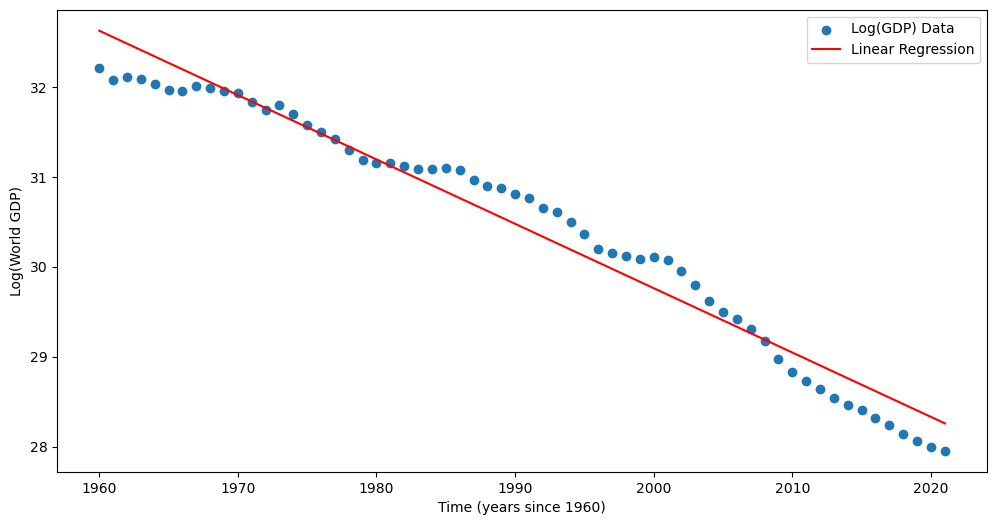

R-squared value: 0.9649781903796448


In [ ]:
#Applied Statistics Lab 4
#1a= (a) Transformation Explanation:
#The transformation applied to the equation GDPk=GDP0(1+r)k s the logarithm transformation.
#By taking the logarithm on both sides, the relationship becomes linearized:log(GDP k)=log(GDP 0)+k⋅log(1+r)

#1b=

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import wb
import scipy.stats

# Download world GDP data
gdp_data = wb.download(indicator='NY.GDP.MKTP.CD', country='WLD', start='1960', end='2021')
time = np.arange(1960, 2022)
gdp = gdp_data.iloc[:, 0].astype(float).to_numpy()

# Apply logarithmic transformation
log_gdp = np.log(gdp)

# Perform linear regression
slope, intercept = np.polyfit(time, log_gdp, 1)

# Plot regression line and scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(time, log_gdp, label='Log(GDP) Data')
plt.plot(time, slope * time + intercept, color='red', label='Linear Regression')
plt.xlabel('Time (years since 1960)')
plt.ylabel('Log(World GDP)')
plt.legend()
plt.show()

# Print R-squared value
r_value = np.corrcoef(time, log_gdp)[0, 1]
r_squared = r_value**2
print(f'R-squared value: {r_squared}')


In [ ]:
#1c=

# Compute residuals
residuals = gdp - non_linear_model

# Print mean and standard deviation of residuals
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

print(f"Mean of Residuals: {residual_mean}")
print(f"Standard Deviation of Residuals (σˆ): {residual_std}")

# Perform KS-test
from scipy.stats import kstest

# Perform KS test against a normal distribution with mean 0 and std σˆ
ks_statistic, ks_p_value = kstest(residuals, 'norm', args=(residual_mean, residual_std))

# Check if the null hypothesis can be rejected at α = 1% significance level
alpha = 0.01
if ks_p_value < alpha:
    print("The null hypothesis is rejected. Residuals do not follow a normal distribution.")
else:
    print("The null hypothesis cannot be rejected. Residuals may follow a normal distribution.")


Mean of Residuals: -2671613108180.5913
Standard Deviation of Residuals (σˆ): 12786582296137.96
The null hypothesis is rejected. Residuals do not follow a normal distribution.


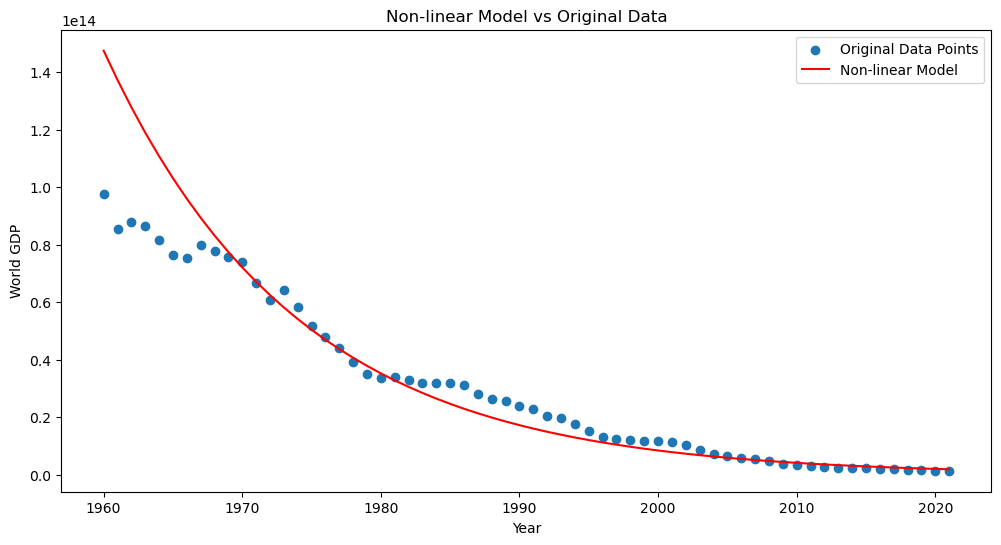

In [ ]:
#1d=


# Assuming you already have the following code to perform linear regression
# Apply logarithmic transformation
log_gdp = np.log(gdp)

# Perform linear regression
coefficients = np.polyfit(time, log_gdp, 1)

# Extract slope and intercept from coefficients
slope, intercept = coefficients

# Define linear model
linear_model = slope * time + intercept

# Apply inverse transformation to get non-linear model
non_linear_model = np.exp(linear_model)

# Plot the original data points and the non-linear model
plt.figure(figsize=(12, 6))
plt.scatter(time, gdp, label='Original Data Points')
plt.plot(time, non_linear_model, color='red', label='Non-linear Model')
plt.title('Non-linear Model vs Original Data')
plt.xlabel('Year')
plt.ylabel('World GDP')
plt.legend()
plt.show()


In [ ]:
#1e=
#The relationship between the slope of the regression line and the long-term growth rate of the world GDP can be understood
#in the context of the logarithmic transformation applied to the GDP data.

#The linear model resulting from the regression is in the form:

#log(GDP)=a⋅time+b

#where a is the slope of the regression line.

#Considering the original exponential relationship between GDP and time:

#GDPk=GDP0⋅(1+r)k

#Taking the logarithm on both sides to linearize the relationship:

#log(GDP k)=log(GDP 0)+k⋅log(1+r)

#Comparing this with the linear model, we can see that the slope a is equivalent to log
#(1+r).

#Therefore, the long-term growth rate (r) can be computed by taking the exponential of the slope:

#r=exp(a)−1

#This implies that the slope of the regression line represents the logarithm of the long-term growth rate,
#and exponentiating the slope provides the actual growth rate.


#1f =

#A sustained period of economic decline, where the GDP is approaching zero, could indicate a severe recession or economic crisis.
#This might be attributed to factors such as a financial crisis, economic imbalances, or external shocks.
#Additionally since 2015 the trend is the economy hasn't grown at all which can further prove this point, as if their was growth,
# we would see a more gradual fall instead of the economy being stuck in one area and nor rising or falling.

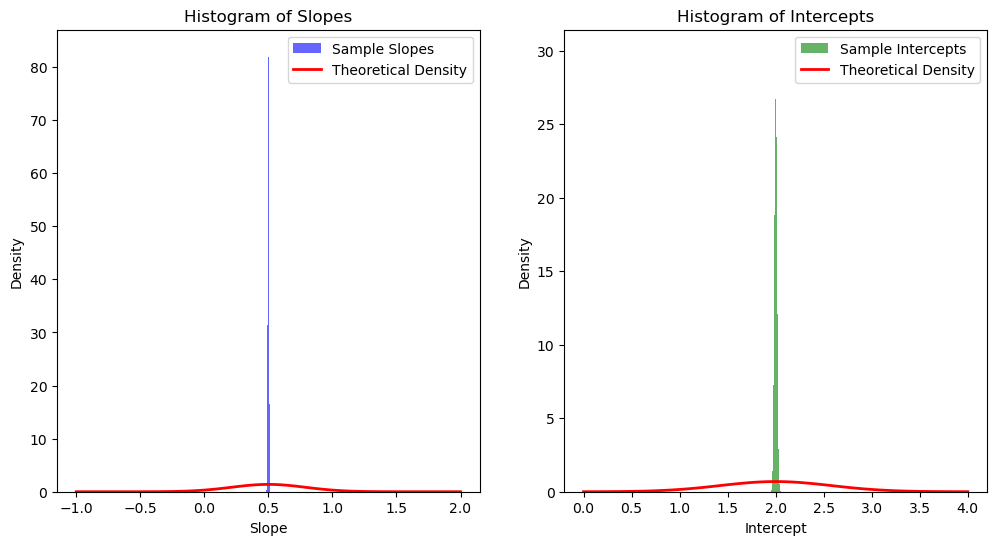

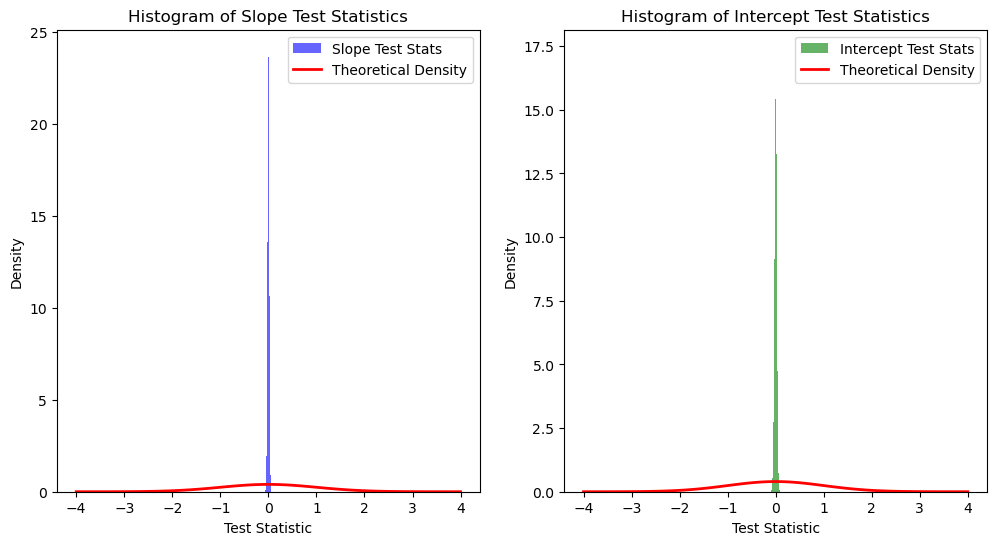

P-value for the first test: 0.9986385050056621
P-value for the second test: 0.9734741505479836


In [ ]:
#2a=

from scipy.stats import linregress

slopes = []
intercepts = []

for _ in range(10000):
    epsilon = np.random.normal(loc=0, scale=1/5, size=N)
    yi = (1/2) * x + 2 + epsilon

    # Perform linear regression
    result = linregress(x, yi)

    slopes.append(result.slope)
    intercepts.append(result.intercept)



#2b=

# Plot histograms of slopes and intercepts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(slopes, bins=50, density=True, alpha=0.6, color='blue', label='Sample Slopes')
plt.title('Histogram of Slopes')
plt.xlabel('Slope')
plt.ylabel('Density')

slope_theoretical = np.linspace(-1, 2, 100)
plt.plot(slope_theoretical, norm.pdf(slope_theoretical, a_true, np.sqrt(1/12)), 'r-', lw=2, label='Theoretical Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(intercepts, bins=50, density=True, alpha=0.6, color='green', label='Sample Intercepts')
plt.title('Histogram of Intercepts')
plt.xlabel('Intercept')
plt.ylabel('Density')

intercept_theoretical = np.linspace(0, 4, 100)
plt.plot(intercept_theoretical, norm.pdf(intercept_theoretical, b_true, np.sqrt(1/3)), 'r-', lw=2, label='Theoretical Density')
plt.legend()

plt.show()

#2c =

# Functions for computing test statistics
def slope_test_statistic(slope):
    return (slope - a_true) / np.sqrt(1/12)

def intercept_test_statistic(intercept):
    return (intercept - b_true) / np.sqrt(1/3)

# Compute test statistics for slopes and intercepts
slope_test_stats = [slope_test_statistic(slope) for slope in slopes]
intercept_test_stats = [intercept_test_statistic(intercept) for intercept in intercepts]

# Plot histograms of test statistics
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(slope_test_stats, bins=50, density=True, alpha=0.6, color='blue', label='Slope Test Stats')
plt.title('Histogram of Slope Test Statistics')
plt.xlabel('Test Statistic')
plt.ylabel('Density')

slope_theoretical_dist = np.linspace(-4, 4, 100)
plt.plot(slope_theoretical_dist, norm.pdf(slope_theoretical_dist, 0, 1), 'r-', lw=2, label='Theoretical Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(intercept_test_stats, bins=50, density=True, alpha=0.6, color='green', label='Intercept Test Stats')
plt.title('Histogram of Intercept Test Statistics')
plt.xlabel('Test Statistic')
plt.ylabel('Density')

intercept_theoretical_dist = np.linspace(-4, 4, 100)
plt.plot(intercept_theoretical_dist, norm.pdf(intercept_theoretical_dist, 0, 1), 'r-', lw=2, label='Theoretical Density')
plt.legend()

plt.show()

#2d =

# Last set of regression
y_last = a_true * x + b_true + errors[-1]
slope_last, intercept_last = np.polyfit(x, y_last, 1)

# First test: H0 : a = 1/2 (assuming b = 2)
slope_test_statistic_first = slope_test_statistic(slope_last)
p_value_first_test = 2 * (1 - norm.cdf(np.abs(slope_test_statistic_first)))

# Second test: H0 : b = 2 (assuming a = 1/2)
intercept_test_statistic_second = intercept_test_statistic(intercept_last)
p_value_second_test = 2 * (1 - norm.cdf(np.abs(intercept_test_statistic_second)))

print(f"P-value for the first test: {p_value_first_test}")
print(f"P-value for the second test: {p_value_second_test}")



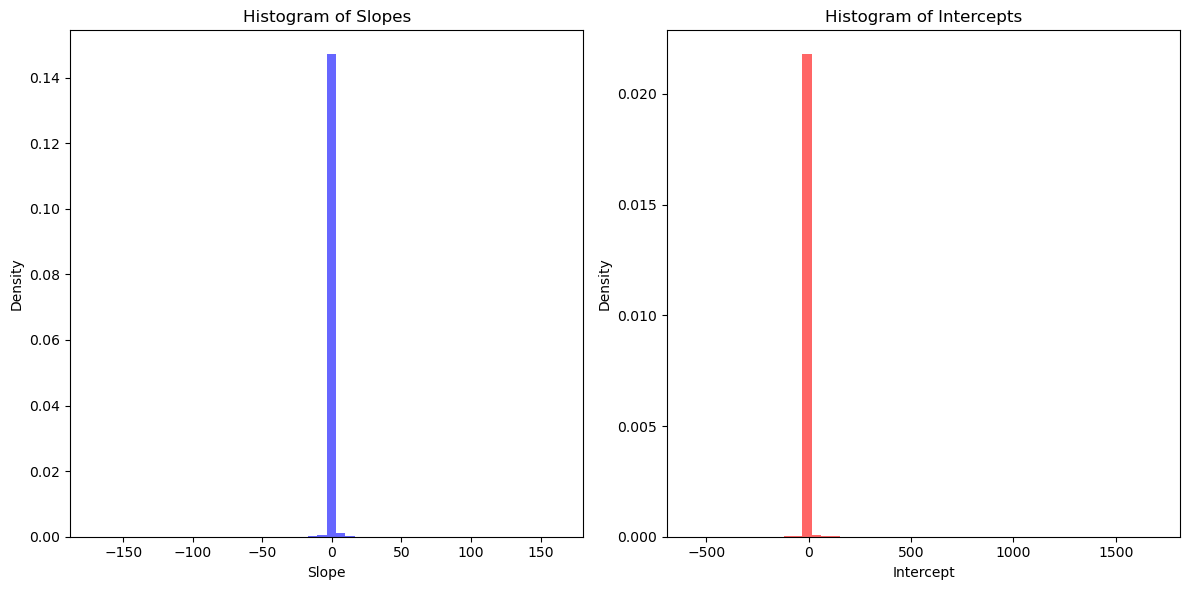

In [ ]:
#2e=

import numpy as np
import matplotlib.pyplot as plt

# Constants
a = 1 / 2
b = 2
N = 200
num_simulations = 10000

# Generate x values
x = np.linspace(-5, 5, N)

# Lists to store slopes and intercepts
slopes = []
intercepts = []

# Run simulations
for _ in range(num_simulations):
    # Generate errors from the Cauchy distribution
    epsilon = np.random.standard_cauchy(N) / 5

    # Generate y values based on the model
    y = a * x + b + epsilon

    # Perform linear regression
    slope, intercept = np.polyfit(x, y, 1)

    # Store slope and intercept
    slopes.append(slope)
    intercepts.append(intercept)

# Plot histograms of slopes and intercepts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(slopes, bins=50, density=True, alpha=0.6, color='b', label='Simulated Slopes')
plt.title('Histogram of Slopes')
plt.xlabel('Slope')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.hist(intercepts, bins=50, density=True, alpha=0.6, color='r', label='Simulated Intercepts')
plt.title('Histogram of Intercepts')
plt.xlabel('Intercept')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

#In my observations I can see based on the cauchy distrubutions Notable deviations from the normal distribution scenario
#can be seen in the histograms produced by simulations using the Cauchy distribution.
#The distribution may be skewed by more extreme values, which would cause the slopes to reflect a broader range and diverge from,
#the true slope value of \(1/2\).
#Similarly, the histogram of the intercepts shows a less concentrated distribution around the actual intercept value of \(2\),
#which is caused by the heavy tails of the Cauchy distribution.
#The Cauchy distribution's heavier tails occasionally introduce extreme values,
#which show how they affect estimates from linear regression.
#This characteristic highlights the impact of the distribution on robustness,
#since the Cauchy distribution makes linear regression more susceptible to outliers.
